In [299]:
import pandas as pd
import numpy as np
import seaborn as sns

In [300]:
data = pd.read_csv("breast cancer.csv")
data.drop(columns=['Unnamed: 0'],inplace=True)
data.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   Age          286 non-null    object
 2   Menopause    286 non-null    object
 3   Tumor-size   286 non-null    object
 4   Inv-nodes    286 non-null    object
 5   Node-caps    286 non-null    object
 6   Deg-malig    286 non-null    int64 
 7   Breast       286 non-null    object
 8   Breast-quad  286 non-null    object
 9   Irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [302]:
data.describe()

,Deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [303]:
data['Age'].value_counts()

Age
50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: count, dtype: int64

In [304]:
data['Age'].replace({'20-29':0,'30-39':1,'40-49':2,'50-59':3,'60-69':4,'70-79':5},inplace=True)

In [305]:
data['Tumor-size'].value_counts()

Tumor-size
30-34    60
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
0-4       8
50-54     8
5-9       4
45-49     3
Name: count, dtype: int64

In [306]:
data['Tumor-size'].replace({'0-4':0,'5-9':1,'10-14':2,'15-19':3,'20-24':4,'25-29':5,'30-34':6,'35-39':7,'40-44':8,'45-49':9,'50-54':10},inplace=True)

In [307]:
data['Inv-nodes'].value_counts()

Inv-nodes
0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: count, dtype: int64

In [308]:
data['Inv-nodes'].replace({'0-2':0,'3-5':1,'6-8':2,'9-11':3,'12-14':4,'15-17':5,'24-26':6},inplace=True)

In [309]:
data[['Class','Menopause','Node-caps','Breast','Breast-quad','Irradiat']] = data[['Class','Menopause','Node-caps','Breast','Breast-quad','Irradiat']].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Class        286 non-null    category
 1   Age          286 non-null    int64   
 2   Menopause    286 non-null    category
 3   Tumor-size   286 non-null    int64   
 4   Inv-nodes    286 non-null    int64   
 5   Node-caps    286 non-null    category
 6   Deg-malig    286 non-null    int64   
 7   Breast       286 non-null    category
 8   Breast-quad  286 non-null    category
 9   Irradiat     286 non-null    category
dtypes: category(6), int64(4)
memory usage: 11.6 KB


In [310]:
categorical = pd.DataFrame()
continuous = pd.DataFrame()

In [311]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in data.columns:
    if(data[i].dtype == 'category'):
        data[i] = label.fit_transform(data[i])
        categorical[i] = data[i]
    else:
        continuous[i] = data[i]
categorical,continuous

(     Class  Menopause  Node-caps  Breast  Breast-quad  Irradiat
 0        0          2          1       0            2         0
 1        0          2          1       1            5         0
 2        0          2          1       0            2         0
 3        0          0          1       1            3         0
 4        0          2          1       1            4         0
 ..     ...        ...        ...     ...          ...       ...
 281      1          2          1       0            3         0
 282      1          2          1       0            3         1
 283      1          0          1       1            3         0
 284      1          0          1       0            2         0
 285      1          0          1       0            2         0
 
 [286 rows x 6 columns],
      Age  Tumor-size  Inv-nodes  Deg-malig
 0      1           6          0          3
 1      2           4          0          2
 2      2           4          0          2
 3      4        

In [312]:
from scipy import stats

for i in categorical.columns:
    stats.pointbiserialr(categorical[i], data['Irradiat'])
    print(i +' '+ str(stats.pointbiserialr(categorical[i], data['Irradiat'])[0]))

Class 0.19391246495177308
Menopause 0.041752130348586144
Node-caps 0.1966134284809647
Breast 0.018761203912656954
Breast-quad 0.018375905737809402
Irradiat 1.0


<Axes: >

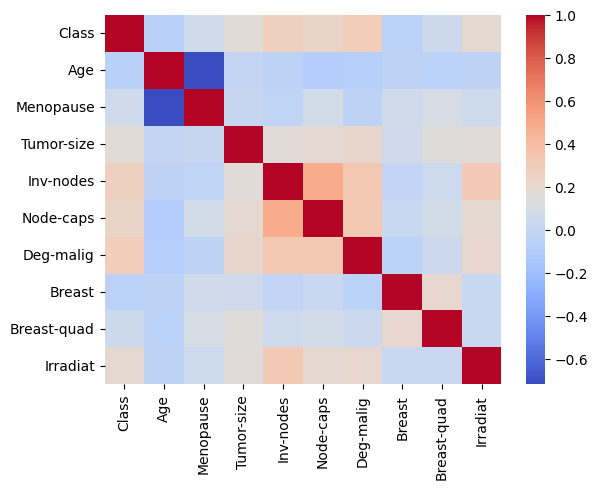

In [313]:
sns.heatmap(data.corr(),cmap='coolwarm')